# 2. Naive Bayes for spam fitering.

Question 2d: In this problem we will use the Naive Bayes algorithm to t a spam lter by hand.
This will enhance your understanding to Bayes classier and build intuition.
Spam lters are used in all email services to classify received emails as \Spam" or \Not
Spam". A simple approach involves maintaining a vocabulary of words that commonly
occur in \Spam" emails and classifying an email as \Spam" if the number of words
from the dictionary that are present in the email is over a certain threshold. We are
given the vocabulary consists of 15 words
V = fsecret, oer, low, price, valued, customer, today, dollar, million, sports, is, for, play, healthy, pizzag:
We will use Vi to represent the ith word in V . As our training dataset, we are also
given 3 example spam messages,
 million dollar oer
 secret oer today
 secret is secret
and 4 example non-spam messages
 low price for valued customer
 play secret sports today
 sports is healthy
 low price pizza
Recall that the Naive Bayes classier assumes the probability of an input x = [x1; x2; : : : ; xn]T
depends on its class y. In our case the input vector x corresponding to each message
has length n = 15 equal to the number of words in the vocabulary V , where each entry
xi is equal to the number of times word Vi occurs in x.

(10 points) Given a new message \today is secret", decide whether it is spam or
not spam, based on the Naive Bayes classier, learned from the above data.

In [3]:
Probablity_Spam = (1/3 * 1/3 * 3/3 * 3/7 ) / ((1/3 * 1/3 * 3/3 * 3/7 ) + (1/4 * 1/4 * 1/4 * 4/7 )) * 100
print('Probability of Spam: ',Probablity_Spam)


Probablity_Non_Spam = (1/4 * 1/4 * 1/4 * 4/7) / ((1/4 * 1/4 * 1/4 * 4/7) + (1/3 * 1/3 * 3/3 * 3/7)) * 100
print('Probability of Non-Spam:',Probablity_Non_Spam)

if (Probablity_Spam > Probablity_Non_Spam):
    print("Given message - Spam", 'with Probability ', round(Probablity_Spam),'%')
else:
    print("Given message - non-Spam", 'with Probability ', round(Probablity_Non_Spam),'%')

Probability of Spam:  84.21052631578948
Probability of Non-Spam: 15.789473684210527
Given message - Spam with Probability  84 %


# 3 Comparing Bayes, logistic, and KNN classifiers. (40 points)

Part One (Divorce classication/prediction). (20 points)
This dataset is about participants who completed the personal information form
and a divorce predictors scale.
The data is a modied version of the publicly available at https://archive.
ics.uci.edu/ml/datasets/Divorce+Predictors+data+set (by injecting noise
so you will not replicate the results on uci website). There are 170 participants
and 54 attributes (or predictor variables) that are all real-valued. The dataset
q3.csv. The last column of the CSV le is label y (1 means \divorce", 0 means
\no divorce"). Each column is for one feature (predictor variable), and each
row is a sample (participant). A detailed explanation for each feature (predictor
variable) can be found at the website link above. Our goal is to build a classier
using training data, such that given a test sample, we can classify (or essentially
predict) whether its label is 0 (\no divorce") or 1 (\divorce").
Build three classiers using (Naive Bayes, Logistic Regression, KNN). Use the rst
80% data for training and the remaining 20% for testing. If you use scikit-learn
you can use train test split to split the dataset.


i. Report testing accuracy for each of the three classiers. Comment on their
performance: which performs the best and make a guess why they perform
the best in this setting.

In [4]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Import data into a data frame

data = pd.read_csv('q3.csv', header=None)
np.random.seed(100)

# create training and test set

(X_train, X_test, y_train, y_test) = train_test_split(data.iloc[:, 0:-1], data.iloc[:, -1], test_size=0.2, shuffle=True)

# Naive Bayes

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
bayes_predict = naive_bayes.predict(X_test)
out = confusion_matrix(y_true=y_test, y_pred=bayes_predict, labels=[0,
                          1])
acc_naive_bayes = np.sum(np.diagonal(out)) / np.sum(out)
print ('Accuracy: Naive Bayes - ' + str(round(acc_naive_bayes,3)*100)+"%")

# Logistic Regression

logit = LogR()
logit.fit(X_train, y_train)
log_predict = logit.predict(X_test)
output_logit = confusion_matrix(y_true=y_test, y_pred=log_predict, labels=[0,1])
acc_LogR = np.sum(np.diagonal(output_logit)) / np.sum(output_logit)
print ('Accuracy: Logistic Regression - ' +str(round(acc_LogR,3)*100)+"%")

# K-Nearest Neighbours

KNN = knn()
KNN.fit(X_train, y_train)
knn_predict = KNN.predict(X_test)
output_KNN = confusion_matrix(y_true=y_test, y_pred=knn_predict, labels=[0,1])
acc_KNN = np.sum(np.diagonal(output_KNN)) / np.sum(output_KNN)
print ('Accuracy: KNN - ' +str(round(acc_KNN,3)*100)+"%")

Accuracy: Naive Bayes - 100.0%
Accuracy: Logistic Regression - 97.1%
Accuracy: KNN - 100.0%


ii. Use the first two features to train three new classifiers. Plot the data points
and decision boundary of each classifier. Comment on the difference between
the decision boundary for the three classifiers. Please clearly represent the
data points with dierent labels using different colors.

Naive Bayes

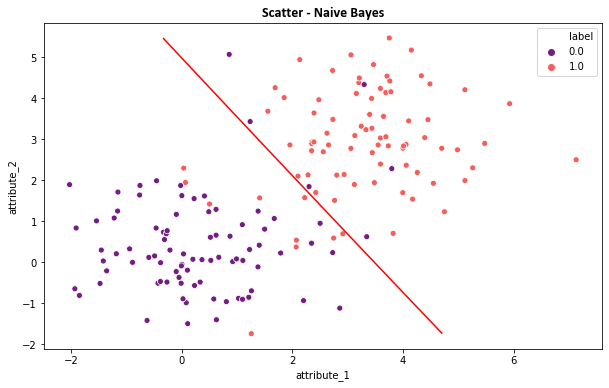

In [7]:
# Import data into a data frame

data_cp = data.iloc[:, [0, 1, -1]]
data_cp.rename(columns={0: 'attribute_1', 1: 'attribute_2', 54: 'label'},
                inplace=True)

# split original data to training and testing sets 80:20

(X_train, X_test, y_train, y_test) = train_test_split(data.iloc[:, 0:2], data.iloc[:, -1], test_size=0.2, shuffle=True)

# navie bayes with GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
bayes_predict = naive_bayes.predict(X_test)

x_axis = (data_cp['attribute_1'].min(), data_cp['attribute_1'].max())
y_axis = (data_cp['attribute_2'].min(), data_cp['attribute_2'].max())
(x, y) = np.meshgrid(np.linspace(x_axis[0], x_axis[1], 100),np.linspace(y_axis[0], y_axis[1], 100))
D = naive_bayes.predict_proba(np.c_[x.ravel(), y.ravel()])
D = D[:, 1].reshape(x.shape)

plt.figure(figsize=(10, 6))
plt.title("Scatter - Naive Bayes",fontname="Calibri",fontweight="bold",fontsize=14)
naive_p = sns.scatterplot(x='attribute_1', y='attribute_2', hue='label',
                     data=data_cp, palette='magma')

naive_p.contour(x, y, D, [0.75], colors='r')

naive_p.set_xlabel('attribute_1')
naive_p.set_ylabel('attribute_2')

plt.show()

Logistic Regression

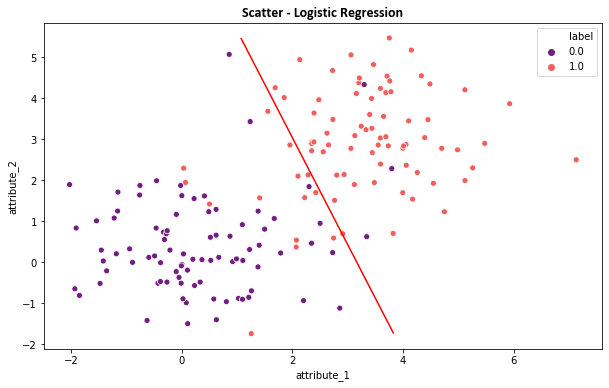

In [8]:
logit = LogR()
logit.fit(X_train, y_train)
log_predict = logit.predict(X_test)
out = confusion_matrix(y_true=y_test, y_pred=log_predict, labels=[0,1])


x_axis = (data_cp['attribute_1'].min(), data_cp['attribute_1'].max())
y_axis = (data_cp['attribute_2'].min(), data_cp['attribute_2'].max())
x, y = np.meshgrid(np.linspace(x_axis[0], x_axis[1], 100),
                     np.linspace(y_axis[0], y_axis[1], 100))
D = logit.predict_proba(np.c_[x.ravel(), y.ravel()])
D = D[:, 1].reshape(x.shape)

plt.figure(figsize=(10, 6))
plt.title("Scatter - Logistic Regression",fontname="Calibri",fontweight="bold",fontsize=14)
log_p = sns.scatterplot(x='attribute_1',y='attribute_2',hue='label',data=data_cp,palette = "magma")

log_p.contour(x, y, D, [0.75],colors='r')


log_p.set_xlabel('attribute_1')
log_p.set_ylabel('attribute_2')

plt.show()

KNN

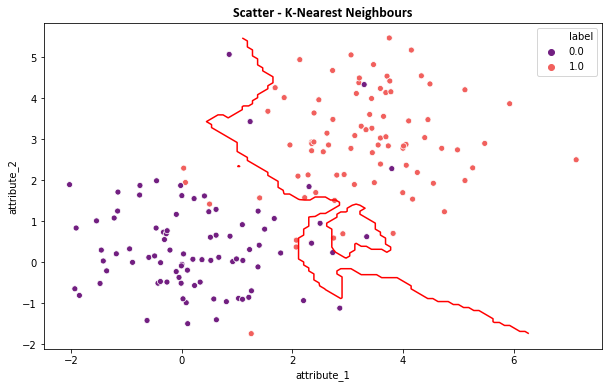

In [9]:
KNN = knn()
KNN.fit(X_train, y_train)
prediction = KNN.predict(X_test)
out = confusion_matrix(y_true=y_test, y_pred=prediction)


x_axis = (data_cp['attribute_1'].min(), data_cp['attribute_1'].max())
y_axis = (data_cp['attribute_2'].min(), data_cp['attribute_2'].max())
x, y = np.meshgrid(np.linspace(x_axis[0], x_axis[1], 100),
                     np.linspace(y_axis[0], y_axis[1], 100))
D = KNN.predict_proba(np.c_[x.ravel(), y.ravel()])
D = D[:, 1].reshape(x.shape)

plt.figure(figsize=(10, 6))
plt.title("Scatter - K-Nearest Neighbours",fontname="Calibri",fontweight="bold",fontsize=14)
KNN_p = sns.scatterplot(x='attribute_1',y='attribute_2',hue='label',data=data_cp,palette = "magma")

KNN_p.contour(x, y, D, [0.75],colors='r')


KNN_p.set_xlabel('attribute_1')
KNN_p.set_ylabel('attribute_2')

plt.show()

Part Two (Handwritten digits classication). (20 points)
Repeat the above using the MNIST Data in our previous homework. Here, give
\digit" 6 label y = 1, and give \digit" 2 label y = 0. All the pixels in each image
will be the feature (predictor variables) for that sample (i.e., image). Our goal is
to build classier to such that given a new test sample, we can tell is it a 2 or a
6. Using the rst 80% of the samples for training and remaining 20% for testing.
Report the classication accuracy on testing data, for each of the three classiers.
Comment on their performance: which performs the best and make a guess why
they perform the best in this setting.

In [12]:
data = pd.read_csv("data.dat", sep='\s+',header=None).T
label = pd.read_csv("label.dat",sep='\s+',header=None).T
label.rename(columns={0:"label"},inplace=True)
label['label'][label['label']==2.0]=0
label['label'][label['label']==6.0]=1


X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2,shuffle=True)
print ("Accuracy:")
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train['label'])
bayes_predict = naive_bayes.predict(X_test)
out = confusion_matrix(y_true=y_test, y_pred=bayes_predict, labels=[0,1])
acc_naive_bayes = np.sum(np.diagonal(out))/np.sum(out)
print ("Naive Bayes : "+str(round(acc_naive_bayes,3)*100)+"%")

logit = LogR()
logit.fit(X_train, y_train['label'])
log_predict = logit.predict(X_test)
out = confusion_matrix(y_true=y_test, y_pred=log_predict, labels=[0,1])
acc_LogR = np.sum(np.diagonal(out))/np.sum(out)
print ("Logistic Regression : "+str(round(acc_LogR,3)*100)+"%")

KNN = knn()
KNN.fit(X_train, y_train['label'])
knn_predict = KNN.predict(X_test)
out = confusion_matrix(y_true=y_test, y_pred=knn_predict, labels=[0,1])
acc_KNN = np.sum(np.diagonal(out))/np.sum(out)
print ("K-Nearest Neighbours : "+str(round(acc_KNN,3)*100)+"%")

Accuracy:
Naive Bayes : 81.2%
Logistic Regression : 97.2%
K-Nearest Neighbours : 99.7%
